In [1]:
import pandas as pd
import networkx as nx
import collections
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly as py
import operator
from fa2 import ForceAtlas2
import matplotlib.colors as pltcolors
from community import community_louvain
import seaborn as sns
import re

In [2]:
books = pd.read_pickle("scraped_book_info.pcl").drop_duplicates(subset=['title'])[0:764]
books["title"] = books['title'].apply(lambda x: re.sub(r"(\s*\(.*\))", "", x))
books = books.reset_index(drop=True)
for i in range(len(books)):
    books.related[i] = [re.sub(r"(\s*\(.*\))", "", related) for related in books.related[i][0]]

In [4]:
len(books)

764

In [3]:
table_of_books = pd.read_pickle("all_titles_pos_new.pcl")

In [6]:
table_of_books

title  \
0                       To Kill a Mockingbird   
1       Harry Potter and the Sorcerer's Stone   
2                         Pride and Prejudice   
3                   The Diary of a Young Girl   
4                                        1984   
..                                        ...   
995                 And the Ass Saw the Angel   
996                     The End of the Affair   
997                                    Legend   
998  The Decline and Fall of the Roman Empire   
999                        People of the Book   

                                                   url  
0                /book/show/2657.To_Kill_a_Mockingbird  
1    /book/show/3.Harry_Potter_and_the_Sorcerer_s_S...  
2                  /book/show/1885.Pride_and_Prejudice  
3           /book/show/48855.The_Diary_of_a_Young_Girl  
4                                 /book/show/5470.1984  
..                                                 ...  
995         /book/show/68682.And_the_Ass_Saw_the_Angel  
996             /book/show/29641.The_End_of_the_Affair  
997                          /book/show/9275658-legend  
998  /book/show/19400.The_Decline_and_Fall_of_the_R...  
999              /book/show/1379961.People_of_the_Book  

[1000 rows x 2 columns]

In [7]:
books_new = pd.merge(table_of_books, books, how="left", on="title")

In [8]:
books_new

title  \
0                       To Kill a Mockingbird   
1       Harry Potter and the Sorcerer's Stone   
2                         Pride and Prejudice   
3                   The Diary of a Young Girl   
4                                        1984   
..                                        ...   
995                 And the Ass Saw the Angel   
996                     The End of the Affair   
997                                    Legend   
998  The Decline and Fall of the Roman Empire   
999                        People of the Book   

                                                   url         author  \
0                /book/show/2657.To_Kill_a_Mockingbird     Harper Lee   
1    /book/show/3.Harry_Potter_and_the_Sorcerer_s_S...   J.K. Rowling   
2                  /book/show/1885.Pride_and_Prejudice    Jane Austen   
3           /book/show/48855.The_Diary_of_a_Young_Girl     Anne Frank   
4                                 /book/show/5470.1984  George Orwell   
..                                                 ...            ...   
995         /book/show/68682.And_the_Ass_Saw_the_Angel            NaN   
996             /book/show/29641.The_End_of_the_Affair            NaN   
997                          /book/show/9275658-legend            NaN   
998  /book/show/19400.The_Decline_and_Fall_of_the_R...            NaN   
999              /book/show/1379961.People_of_the_Book            NaN   

          genre rating rating_count  \
0      Classics   4.27      4058926   
1       Fantasy   4.47      6186514   
2      Classics   4.25      2662196   
3    Nonfiction   4.13      2474246   
4      Classics   4.17      2711604   
..          ...    ...          ...   
995         NaN    NaN          NaN   
996         NaN    NaN          NaN   
997         NaN    NaN          NaN   
998         NaN    NaN          NaN   
999         NaN    NaN          NaN   

                                               related  \
0    [Harry Potter and the Deathly Hallows, Lord of...   
1    [Lord of the Flies, A Wrinkle in Time, Speak, ...   
2    [Harry Potter and the Deathly Hallows, Lord of...   
3    [Lord of the Flies, Harry Potter and the Death...   
4    [Lord of the Flies, Harry Potter and the Death...   
..                                                 ...   
995                                                NaN   
996                                                NaN   
997                                                NaN   
998                                                NaN   
999                                                NaN   

                                                review  
0    [[\n           \n           Why is it when I p...  
1    [[\n\n \nUPDATE OCTOBER 2019\nShould I try to ...  
2    [[\n           \n           6.0 stars. Confess...  
3    [[\nWhy do we write reviews?You have a lot of ...  
4    [[\nThis book is far from perfect. Its charact...  
..                                                 ...  
995                                                NaN  
996                                                NaN  
997                                                NaN  
998                                                NaN  
999                                                NaN  

[1000 rows x 8 columns]

In [9]:
books_new = books_new.drop(["url"], axis = 1)

In [10]:
books_new

title         author       genre  \
0                       To Kill a Mockingbird     Harper Lee    Classics   
1       Harry Potter and the Sorcerer's Stone   J.K. Rowling     Fantasy   
2                         Pride and Prejudice    Jane Austen    Classics   
3                   The Diary of a Young Girl     Anne Frank  Nonfiction   
4                                        1984  George Orwell    Classics   
..                                        ...            ...         ...   
995                 And the Ass Saw the Angel            NaN         NaN   
996                     The End of the Affair            NaN         NaN   
997                                    Legend            NaN         NaN   
998  The Decline and Fall of the Roman Empire            NaN         NaN   
999                        People of the Book            NaN         NaN   

    rating rating_count                                            related  \
0     4.27      4058926  [Harry Potter and the Deathly Hallows, Lord of...   
1     4.47      6186514  [Lord of the Flies, A Wrinkle in Time, Speak, ...   
2     4.25      2662196  [Harry Potter and the Deathly Hallows, Lord of...   
3     4.13      2474246  [Lord of the Flies, Harry Potter and the Death...   
4     4.17      2711604  [Lord of the Flies, Harry Potter and the Death...   
..     ...          ...                                                ...   
995    NaN          NaN                                                NaN   
996    NaN          NaN                                                NaN   
997    NaN          NaN                                                NaN   
998    NaN          NaN                                                NaN   
999    NaN          NaN                                                NaN   

                                                review  
0    [[\n           \n           Why is it when I p...  
1    [[\n\n \nUPDATE OCTOBER 2019\nShould I try to ...  
2    [[\n           \n           6.0 stars. Confess...  
3    [[\nWhy do we write reviews?You have a lot of ...  
4    [[\nThis book is far from perfect. Its charact...  
..                                                 ...  
995                                                NaN  
996                                                NaN  
997                                                NaN  
998                                                NaN  
999                                                NaN  

[1000 rows x 7 columns]

In [11]:
books = books_new[books_new.author.notna()]

In [12]:
books

title          author       genre  \
0                       To Kill a Mockingbird      Harper Lee    Classics   
1       Harry Potter and the Sorcerer's Stone    J.K. Rowling     Fantasy   
2                         Pride and Prejudice     Jane Austen    Classics   
3                   The Diary of a Young Girl      Anne Frank  Nonfiction   
4                                        1984   George Orwell    Classics   
..                                        ...             ...         ...   
900  In Defense of Food: An Eater's Manifesto  Michael Pollan  Nonfiction   
901                 The Manufactured Identity    Heath Sommer  Psychology   
902                          A Thousand Acres     Jane Smiley     Fiction   
908                    Me Talk Pretty One Day   David Sedaris       Humor   
944                               Animal Farm   George Orwell    Classics   

    rating rating_count                                            related  \
0     4.27      4058926  [Harry Potter and the Deathly Hallows, Lord of...   
1     4.47      6186514  [Lord of the Flies, A Wrinkle in Time, Speak, ...   
2     4.25      2662196  [Harry Potter and the Deathly Hallows, Lord of...   
3     4.13      2474246  [Lord of the Flies, Harry Potter and the Death...   
4     4.17      2711604  [Lord of the Flies, Harry Potter and the Death...   
..     ...          ...                                                ...   
900   4.08        96589  [What to Eat, The End of Food, Just Food: Wher...   
901   3.52          413  [The Discarded Ones, Carnal: Somewhere Over 40...   
902   3.80        55460  [The Store, Elbow Room, The Collected Stories ...   
908   3.98       581535  [Lord of the Flies, Harry Potter and the Death...   
944   3.92      2430302  [Lord of the Flies, Harry Potter and the Death...   

                                                review  
0    [[\n           \n           Why is it when I p...  
1    [[\n\n \nUPDATE OCTOBER 2019\nShould I try to ...  
2    [[\n           \n           6.0 stars. Confess...  
3    [[\nWhy do we write reviews?You have a lot of ...  
4    [[\nThis book is far from perfect. Its charact...  
..                                                 ...  
900                                                NaN  
901                                                NaN  
902                                                NaN  
908                                                NaN  
944  [[\nAmazon's very Orwellian involvement with t...  

[762 rows x 7 columns]

In [4]:
tob = table_of_books.set_index(['title'])

In [5]:
bob = books.set_index(["title"])

In [6]:
books = bob.reindex(tob.index)

In [7]:
books = books[books.author.notna()]

In [10]:
books

author       genre rating  \
title                                                                         
To Kill a Mockingbird                         Harper Lee    Classics   4.27   
Harry Potter and the Sorcerer's Stone       J.K. Rowling     Fantasy   4.47   
Pride and Prejudice                          Jane Austen    Classics   4.25   
The Diary of a Young Girl                     Anne Frank  Nonfiction   4.13   
1984                                       George Orwell    Classics   4.17   
...                                                  ...         ...    ...   
In Defense of Food: An Eater's Manifesto  Michael Pollan  Nonfiction   4.08   
The Manufactured Identity                   Heath Sommer  Psychology   3.52   
A Thousand Acres                             Jane Smiley     Fiction   3.80   
Me Talk Pretty One Day                     David Sedaris       Humor   3.98   
Animal Farm                                George Orwell    Classics   3.92   

                                         rating_count  \
title                                                   
To Kill a Mockingbird                         4058926   
Harry Potter and the Sorcerer's Stone         6186514   
Pride and Prejudice                           2662196   
The Diary of a Young Girl                     2474246   
1984                                          2711604   
...                                               ...   
In Defense of Food: An Eater's Manifesto        96589   
The Manufactured Identity                         413   
A Thousand Acres                                55460   
Me Talk Pretty One Day                         581535   
Animal Farm                                   2430302   

                                                                                    related  \
title                                                                                         
To Kill a Mockingbird                     [Harry Potter and the Deathly Hallows, Lord of...   
Harry Potter and the Sorcerer's Stone     [Lord of the Flies, A Wrinkle in Time, Speak, ...   
Pride and Prejudice                       [Harry Potter and the Deathly Hallows, Lord of...   
The Diary of a Young Girl                 [Lord of the Flies, Harry Potter and the Death...   
1984                                      [Lord of the Flies, Harry Potter and the Death...   
...                                                                                     ...   
In Defense of Food: An Eater's Manifesto  [What to Eat, The End of Food, Just Food: Wher...   
The Manufactured Identity                 [The Discarded Ones, Carnal: Somewhere Over 40...   
A Thousand Acres                          [The Store, Elbow Room, The Collected Stories ...   
Me Talk Pretty One Day                    [Lord of the Flies, Harry Potter and the Death...   
Animal Farm                               [Lord of the Flies, Harry Potter and the Death...   

                                                                                     review  
title                                                                                        
To Kill a Mockingbird                     [[\n           \n           Why is it when I p...  
Harry Potter and the Sorcerer's Stone     [[\n\n \nUPDATE OCTOBER 2019\nShould I try to ...  
Pride and Prejudice                       [[\n           \n           6.0 stars. Confess...  
The Diary of a Young Girl                 [[\nWhy do we write reviews?You have a lot of ...  
1984                                      [[\nThis book is far from perfect. Its charact...  
...                                                                                     ...  
In Defense of Food: An Eater's Manifesto                                                NaN  
The Manufactured Identity                                                               NaN  
A Thousand Acres                                                                        NaN  
Me Talk Pr

In [9]:
books = books[["title", "author", "genre", "rating", "rating_count", "related", "review"]]

KeyError: "['title'] not in index"

In [11]:
extended_books = pd.read_pickle("extended_book_info.pcl")

In [12]:
extended_books["title"] = extended_books['title'].apply(lambda x: re.sub(r"(\s*\(.*\))", "", x))
extended_books = extended_books.reset_index(drop=True)
for i in range(len(extended_books)):
    extended_books.related[i] = [re.sub(r"(\s*\(.*\))", "", related) for related in extended_books.related[i][0]]

In [13]:
extended_books["review"] = None

In [14]:
extended_books = extended_books[["title", "author", "genre", "rating", "rating_count", "related", "review"]]

In [15]:
extended_books = extended_books.set_index("title", drop=True)

In [16]:
books = pd.concat([books, extended_books])

In [19]:
books = books.drop_duplicates(subset=['title'])

In [25]:
books = books.reset_index(drop=True)

In [31]:
books = books.drop(["index"], axis=1)

In [32]:
books.to_csv("books_csv.csv", sep = '\t', index = False)

In [33]:
books.to_pickle("books.pcl")

In [21]:
books.rating = pd.to_numeric(books.rating)

In [22]:
books.rating_count = pd.to_numeric(books.rating_count)

In [4]:
genres_accepted = books.groupby("genre")['genre'].count().sort_values(ascending=False)[0:10]

In [5]:
books.loc[~books.genre.apply(lambda x: x in list(genres_accepted.index)), 'genre'] = "Miscellaneous"

In [206]:
books = books.reset_index(drop=True)

In [6]:
import networkx as nx

G = nx.DiGraph()

for i in range(len(books)):
    node = books.iloc[i]
    G.add_node(node['title'], rating = node['rating'], genre = node['genre'])

In [7]:
for i in range(len(books)):
    node = books.iloc[i]['title']
    connections = []
    for related in books.iloc[i]['related']:
        if len(books[books['title'] == related]) == 1 :
            connections.append(related)
    for con in connections:
        G.add_edges_from([(con, node)])

In [146]:
nx.write_gpickle(G,"pos_books_graph.pcl")

In [8]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

In [9]:
print(deg)
print(cnt)

(529, 515, 369, 319, 276, 182, 162, 136, 70, 33, 20, 19, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 5, 10, 12, 18, 41, 44, 57, 62, 70, 78, 79, 84, 75, 108)


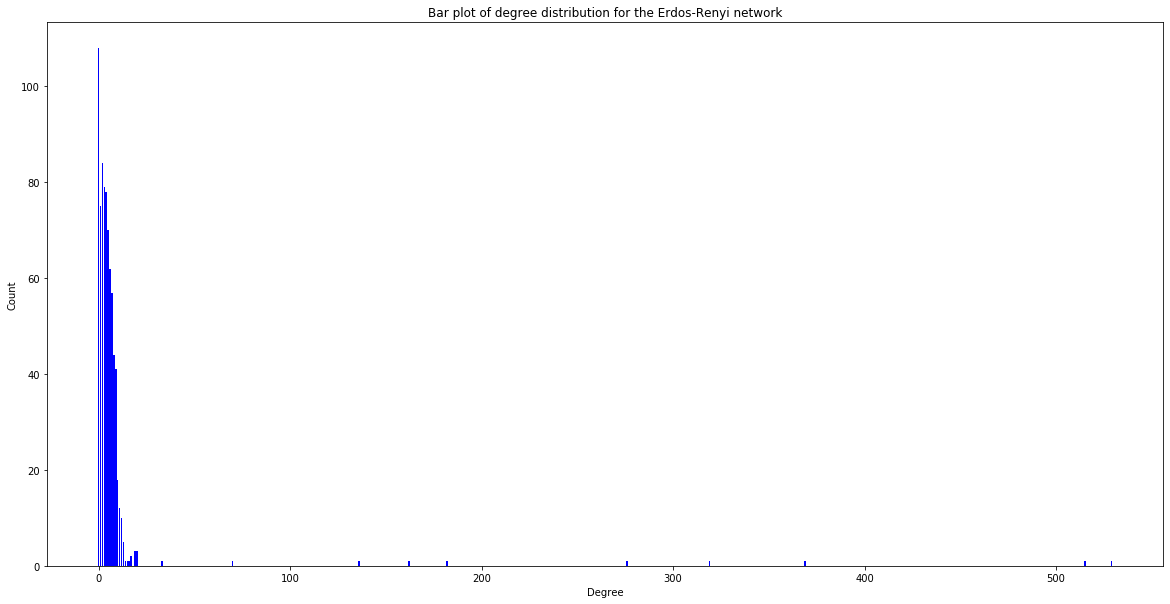

In [10]:
plt.figure(figsize = (20,10))
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Bar plot of degree distribution for the Erdos-Renyi network")
plt.xlabel("Degree")
plt.ylabel("Count")

plt.show()

In [11]:
print(f"The network consists of {nx.number_of_nodes(G)} nodes and {nx.number_of_edges(G)} edges.")

The network consists of 764 nodes and 2959 edges.


In [12]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1,
                        strongGravityMode=False,
                        gravity=1,

                        # Log
                        verbose=False)

In [13]:
def make_plot(G, title):
    # Function generating an interactive plot of network. 
    
    # G : Graph (undirected)
    # pos: posisitional arguments of nodes in G
    # total: Dataframe with measurements for each node determining size in graph
    # d_measurement: string specifying column in measurement dataframe
    #      possible values: 'Degree', 'Betweenness_centrality', 'Eigenvector_centrality'
    
    # Getting mapping of colors for nodes to seperate on parties (Republican = red and Democrat = blue).
    genre = set(nx.get_node_attributes(G,'genre').values())
    
    colors_tmp = list(pltcolors._colors_full_map.values())[0:len(genre)]
    cmap = dict(zip(genre, colors_tmp))
    
    #mapping = dict(zip(sorted(party),count()))
    nodes = G.nodes()
    #mapping["Republican"] = "red"
    #mapping["Democratic"] = "blue"
    colors = [cmap.get(G.node[n]['genre']) for n in nodes]
    
    #Defining positions using Force Atlas algorithm
    pos = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
    
    # Get coordinates of edges
    edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')
    for edge in G.edges():
        x0, y0 = pos.get(edge[0])
        x1, y1 = pos.get(edge[1])
        edge_trace['x'] += tuple([x0, x1, None])
        edge_trace['y'] += tuple([y0, y1, None])
    
    #Get coordinates of nodes
    node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        reversescale=True,
        color=colors,
        size=10,
        line=dict(width=2)))
    for node in G.nodes():
        x, y = pos.get(node)
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])
    
    # Get hover text for nodes
    for node, adjacencies in enumerate(G.adjacency()):
        node_info = 'Name: ' + str(adjacencies[0]) + '<br># of connections: '+str(len(adjacencies[1]))
        node_trace['text']+=tuple([node_info])
    
    # Create figure
    fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title=title,
                titlefont=dict(size=20),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                plot_bgcolor = 'white'))
    return fig

In [14]:
test = make_plot(G, 'test')
py.offline.iplot(test)

In [15]:
d = dict(G.degree)
d_between = dict(nx.betweenness_centrality(G))
d_eigen = dict(nx.eigenvector_centrality(G))

total = pd.DataFrame(data = {'Name' : list(d.keys()), 
                             'Degree' : list(d.values()),
                             'Betweenness_centrality' : list(d_between.values()),
                             'Eigenvector_centrality' : list(d_eigen.values())})
total = total[total['Degree'] != 0]

In [16]:
# We now look at the nodes with the highest degree and their centrality measures and outputs the N (3) with the highest degree
N = 10

degree_sort = pd.DataFrame(list(sorted(G.degree, key=lambda x: x[1], reverse=True)), columns = ("Name", "Degree"))
eigen_sort =   pd.DataFrame(list(sorted(nx.eigenvector_centrality(G).items(), key=operator.itemgetter(1), reverse=True)), columns = ("Name", "Eigenvector centrality"))
between_sort = pd.DataFrame(list(sorted(nx.betweenness_centrality(G).items(), key=operator.itemgetter(1), reverse=True)), columns = ("Name", "Betweenness centrality"))
sort = pd.merge(pd.merge(pd.merge(degree_sort,eigen_sort,on='Name'),between_sort,on='Name'), books[['title', 'genre']], left_on = 'Name', right_on = 'title')
sort = sort.drop(['title'], axis = 1)
sort = sort.sort_values('Degree', ascending=False)

In [17]:
sort[0:N]

Name  Degree  Eigenvector centrality  \
0  Harry Potter and the Deathly Hallows     529                0.127961   
1                     Lord of the Flies     515                0.063292   
2                   The Handmaid's Tale     369                0.057556   
3                     A Wrinkle in Time     319                0.044719   
4                         Anna Karenina     276                0.039744   
5                                 Speak     182                0.033317   
6                        Watership Down     162                0.045394   
7                        White Oleander     136                0.048144   
8                    His Dark Materials      70                0.053834   
9                 2001: A Space Odyssey      33                0.034420   

   Betweenness centrality            genre  
0                0.016125          Fantasy  
1                0.006849         Classics  
2                0.001949          Fiction  
3                0.000701          Fantasy  
4                0.000640         Classics  
5                0.000308      Young Adult  
6                0.000170         Classics  
7                0.001113          Fiction  
8                0.002136          Fantasy  
9                0.000065  Science Fiction

In [18]:
# First we incestigate the modularity based on genre
G_und = nx.to_undirected(G)
M_genre = community_louvain.modularity(nx.get_node_attributes(G_und, "genre"), G_und)
print("The modularity for genre is: %.2f" %(M_genre))

The modularity for genre is: 0.13


In [19]:
# We now use the Louvain Communoty Detection to find the optimal communities based on the twitter data
partition = community_louvain.best_partition(G_und)
communities = list(set(partition.values()))
colors = list(pltcolors._colors_full_map.values())[0:len(communities)]
cmap = dict(zip(communities, colors))
print("The algorithm has identifies %.0f communities" %len(communities))

The algorithm has identifies 128 communities


In [20]:
# Based on the above found communities we can calculate the modularity score
M_party = community_louvain.modularity(partition, G_und)
print("The modularity score based on the optimal communities is: %.2f" %M_party)

The modularity score based on the optimal communities is: 0.22


In [21]:
# We will now compare the the communities found by the algorithm with the actual community (party is used) 
# in a confusion-matrix
member_w_genre = pd.DataFrame(list(nx.get_node_attributes(G, 'genre').items()), columns = ['name', 'genre'])
member_w_com = pd.DataFrame(list(partition.items()), columns = ['name', 'com'])
conf_tmp = pd.merge(member_w_genre, member_w_com, how = 'inner', on = 'name')
conf = conf_tmp.groupby(['com', 'genre']).count().unstack().T.fillna(0).astype(int)

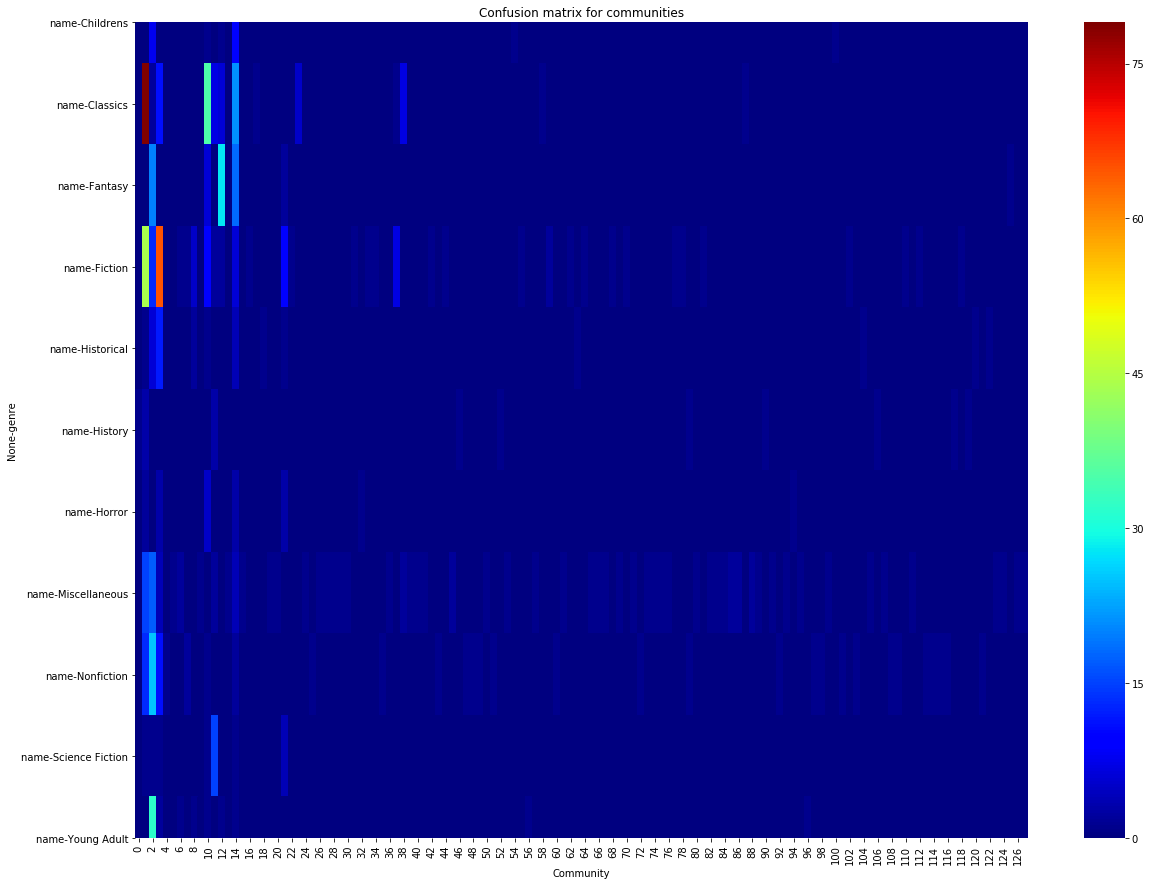

In [22]:
plt.figure(figsize = (20,15))
sns.heatmap(conf, cmap = 'jet')
plt.title("Confusion matrix for communities")
plt.xlabel('Community')
plt.show()

# Text analysis

In [2]:
import pandas as pd
neg_books = pd.read_pickle("negative_books.pcl")

394

In [16]:
books_reviewed = books_reviewed[books_reviewed.review.notna()]

In [198]:
books_reviewed.review[292][0][0]

'\n           \n           I\'m sorry, Mr. Rothfuss. For realz, actual sorry. Honestly. I tried giving your book two stars out of pity, since I so wanted to like it and I\'d feel bad about giving it one star and dragging down your average rating. Though you don\'t appear to need my pity. Your book has the highest average GR rating (4.49) of any of the book I\'ve read. I finally dropped my rating down to one star because it\'s just a steaming pile of crap and I couldn\'t take the embarrassment of having posted a two-star rating on something so awful.Mr. Rothfuss, you probably don\'t give a shit about my rating since, judging from your GR biography, you appear to be very comfortable in your own academic, geeky skin. And that is totally cool. I\'m an academic, geeky type myself. Not as geeky as you. You are really geeky. Like I said: that\'s cool. Anywayz, for a long time I gave you two stars since a couple of my most favorite people (my brother and his fiancé) both love your book. One st

In [27]:
len(books_reviewed)

444

In [3]:
books_reviewed = pd.read_pickle("books.pcl")

In [17]:
total = ''
for i in range(len(books_reviewed.review[290][0])):
    rev = books_reviewed.review[290][0][i]
    total += rev 

In [18]:
import nltk
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
import string
import numpy as np
import math

tokenizer = RegexpTokenizer(r"\w+")
stopwords = nltk.corpus.stopwords.words("english")

In [19]:
def combine_reviews(df_w_reviews):
    words = []

    for book in df_w_reviews.review:
        comb_reviews = ''
        for i in range(len(book[0])):
            rev = book[0][i]
            comb_reviews += rev
        
        #Removing '\n'
        comb_reviews = re.sub(r"(\\n)", r'', comb_reviews)
        
        #Removing links
        comb_reviews = re.sub(r"(https:\/\/.*)", r' ', comb_reviews)
        
        #Removing numbers
        comb_reviews = re.sub(r"\d+", r" ", comb_reviews)
        
        #Removing non-Roman letters
        comb_reviews = re.sub(r"[^A-Z a-z]", r"", comb_reviews)
        
        #Tokenize text
        tokens = tokenizer.tokenize(comb_reviews)
        
        #Remove punctuation
        no_punc = [''.join(c for c in s if c not in string.punctuation) for s in tokens]
        no_punc = [s for s in no_punc if s]
        
        # remove all stopwords and make all tokens lower case 
        tmp = [w.lower() for w in no_punc if w.lower() not in stopwords]
        
        words += tmp
    return words
    

In [20]:
books_reviewed

title              author  \
0                    To Kill a Mockingbird          Harper Lee   
1    Harry Potter and the Sorcerer's Stone        J.K. Rowling   
2                      Pride and Prejudice         Jane Austen   
3                The Diary of a Young Girl          Anne Frank   
4                                     1984       George Orwell   
..                                     ...                 ...   
449                  The Federalist Papers  Alexander Hamilton   
450                           Silas Marner        George Eliot   
451                      A Storm of Swords  George R.R. Martin   
452                  2001: A Space Odyssey    Arthur C. Clarke   
453          The Awakening: Fate in Motion    Suzanne Boisvert   

               genre  rating  rating_count  \
0           Classics    4.27       4058926   
1            Fantasy    4.47       6186514   
2           Classics    4.25       2662196   
3         Nonfiction    4.13       2474246   
4           Classics    4.17       2711604   
..               ...     ...           ...   
449          History    4.07         33265   
450         Classics    3.63         67249   
451          Fantasy    4.54        619385   
452  Science Fiction    4.14        234637   
453     Contemporary    4.31          2557   

                                               related  \
0    [Harry Potter and the Deathly Hallows, Lord of...   
1    [Lord of the Flies, A Wrinkle in Time, Speak, ...   
2    [Harry Potter and the Deathly Hallows, Lord of...   
3    [Lord of the Flies, Harry Potter and the Death...   
4    [Lord of the Flies, Harry Potter and the Death...   
..                                                 ...   
449  [The Anti-Federalist Papers and the Constituti...   
450  [The Last Chronicle of Barset, Anna Karenina, ...   
451  [Harry Potter and the Deathly Hallows, Lord of...   
452  [Lord of the Flies, Harry Potter and the Death...   
453  [How to Crush Social Media in Only 2 Minutes a...   

                                                review  
0    [[\n           \n           Why is it when I p...  
1    [[\n\n \nUPDATE OCTOBER 2019\nShould I try to ...  
2    [[\n           \n           6.0 stars. Confess...  
3    [[\nWhy do we write reviews?You have a lot of ...  
4    [[\nThis book is far from perfect. Its charact...  
..                                                 ...  
449  [[\n           \n           Read the Federalis...  
450  [[\n           \n           Dear Ms Park,I fin...  
451  [[\n\nThis book made me want to throw it again...  
452  [[\n           \n           The book is always...  
453  [[\n           \n           Science fiction, c...  

[442 rows x 7 columns]

In [21]:
pos_revs = combine_reviews(books_reviewed)
neg_revs = combine_reviews(neg_books)

In [22]:
print(f"The document generated for the good books contains {len(pos_revs):,} tokens")
print(f"The document generated for the bad books contains {len(neg_revs):,} tokens")

The document generated for the good books contains 1,447,591 tokens
The document generated for the bad books contains 628,191 tokens


In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None) 

vectors = tfidf.fit_transform([pos_revs, neg_revs])

In [90]:
feature_names = tfidf.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [108]:
pos = dict(df.iloc[0,:])
neg = dict(df.iloc[1,:])

In [118]:
df['book']

0    0.415386
1    0.517531
Name: book, dtype: float64

In [119]:
# We will now look at the TF-IDF (term frequency–inverse document frequency) for the two documents we just created.
# To find the TFIDF the TF and IDF functions are first defined seperately. 

def TF(word_list):
    fdist = nltk.FreqDist(word_list)
    words = np.array(list(fdist.keys()))
    count = np.array(list(fdist.values()))
    tf = count/len(word_list)
    df_tf = pd.DataFrame(data = {'words': words, 'count': count, 'tf': tf}).sort_values("tf", ascending=False)
    return df_tf

# We now turn to inverse document frequency
def IDF(documents):
    N = len(documents)
    combined = []
    for doc in documents:
        combined += doc
    words = pd.DataFrame(data = {"words": list(set(combined)), "idf": np.ones(len(set(combined)))})
    for i, word in enumerate(words["words"]):
        dft = 0
        for doc in documents:
            if word in doc:
                dft += 1
        words["idf"][i] = math.log(N/dft)
    return words

def TFIDF(documents):
    words = IDF(documents)
    tfidf = []
    for doc in documents:
        tf = TF(doc)
        tf = pd.merge(tf, words, on = "words")
        tf["tfidf"] = tf["tf"]*tf["idf"]
        tf = tf.sort_values("tfidf", ascending=False)
        d = tf[["words", "tfidf"]].set_index("words")
        d = d.to_dict()
        tfidf.append(d)
    return tfidf

In [121]:
comb_words = [pos_revs, neg_revs]

In [80]:
neg_revs

['hale',
 'stalking',
 'reviewer',
 'ok',
 'http',
 'www',
 'theguardian',
 'com',
 'books',
 'read',
 'book',
 'part',
 'goodreads',
 'mafia',
 'trying',
 'surreptitiously',
 'ruin',
 'hale',
 'career',
 'kind',
 'illuminati',
 'conspiracy',
 'though',
 'suppose',
 'would',
 'suit',
 'somebody',
 'stoop',
 'lows',
 'think',
 'done',
 'something',
 'makes',
 'feel',
 'physically',
 'ill',
 'think',
 'something',
 'makes',
 'afraid',
 'air',
 'honest',
 'opinion',
 'feel',
 'afraid',
 'safety',
 'let',
 'sink',
 'big',
 'one',
 'invaded',
 'reviewer',
 'privacy',
 'tried',
 'villianise',
 'something',
 'validated',
 'opinion',
 'stalking',
 'bad',
 'review',
 'careful',
 'words',
 'say',
 'would',
 'like',
 'say',
 'lest',
 'dismissed',
 'troll',
 'example',
 'buying',
 'conspiracy',
 'myth',
 'rate',
 'book',
 'one',
 'star',
 'even',
 'writing',
 'review',
 'unknowingly',
 'prove',
 'point',
 'conclusion',
 'come',
 'desire',
 'drive',
 'hale',
 'business',
 'cronies',
 'minister',
 '

In [122]:
tfidf = TFIDF(comb_words)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
tfidf_pos = tfidf[0] # getting the tfidf score for the democrats
tfidf_neg = tfidf[1] # getting the tfidf score for the republicans

In [124]:
def gen_wordcloud(d, title):
    wordcloud = WordCloud(background_color="white",
                    colormap="gnuplot")
    wordcloud.generate_from_frequencies(frequencies=list(d.values())[0])
    fig = plt.figure(figsize = (10,20))
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.title(title, fontsize = 20)
    plt.show()

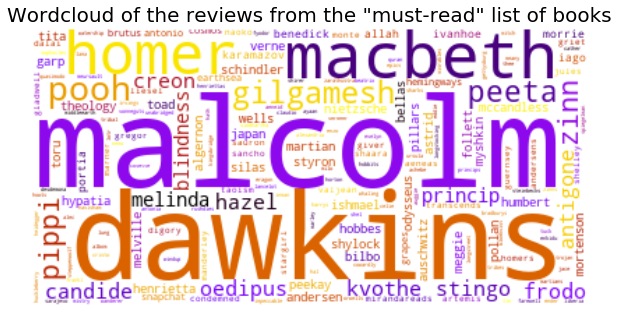

In [125]:
gen_wordcloud(tfidf_pos, 'Wordcloud of the reviews from the "must-read" list of books')

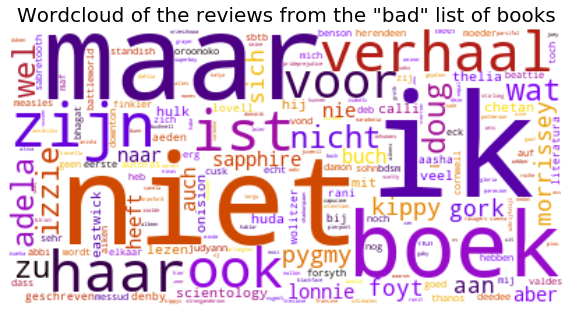

In [126]:
gen_wordcloud(tfidf_neg, 'Wordcloud of the reviews from the "bad" list of books')

In [138]:
import enchant
d = enchant.Dict("en_US")

In [139]:
eng_pos = [w for w in pos_revs if d.check(w)]

In [140]:
len(eng_pos)

1275054

In [141]:
eng_neg = [w for w in neg_revs if d.check(w)]

In [143]:
len(eng_neg)

529413

In [147]:
comb_words_eng = [eng_pos, eng_neg]

In [148]:
tfidf = TFIDF(comb_words_eng)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
tfidf_pos = tfidf[0] # getting the tfidf score for the democrats
tfidf_neg = tfidf[1] # getting the tfidf score for the republicans

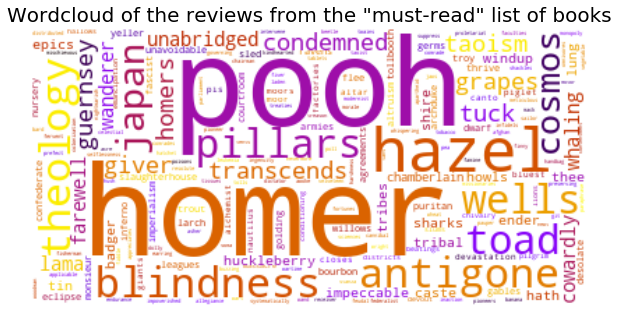

In [150]:
gen_wordcloud(tfidf_pos, 'Wordcloud of the reviews from the "must-read" list of books')

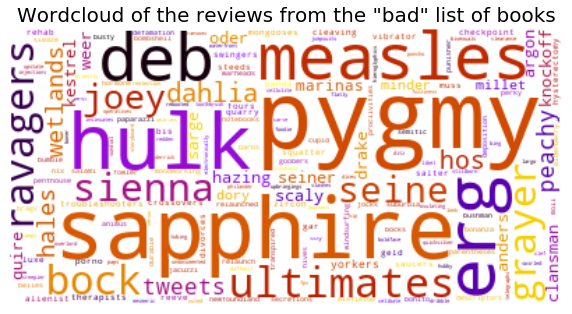

In [151]:
gen_wordcloud(tfidf_neg, 'Wordcloud of the reviews from the "bad" list of books')

In [35]:
import ssl #only necessary for Mac
context = ssl._create_unverified_context()

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn.datasets import fetch_20newsgroups

d = fetch_20newsgroups()

In [41]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(d.data)

In [42]:
transformer = TfidfTransformer()
X_train_tfidf = transformer.fit_transform(X_train_counts)

In [43]:
X_train_counts

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [44]:
X_train_tfidf 

<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

# Sentiment analyse

In [2]:
neg_books = pd.read_pickle("negative_books.pcl")
pos_books = pd.read_pickle("books.pcl")
pos_books_reviewed = pos_books[pos_books.review.notna()]

In [3]:
neg_books = neg_books.reset_index(drop=True)
pos_books_reviewed = pos_books_reviewed.reset_index(drop=True)

In [4]:
def create_review_df(df, tag):
    df_out = []
    idx = []
    for i in range(len(df)):
        for j in range(len(df.review[i][0])):
            df_out.append(df.review[i][0][j])
            idx.append(i)
    df_out = pd.DataFrame(df_out)
    idx = pd.DataFrame(idx)
    df_out["pos"] = tag
    df_out["idx_original"] = idx
    return df_out

In [5]:
pos_df = create_review_df(pos_books_reviewed, 1)
neg_df = create_review_df(neg_books, 0)

"\n           \n           Why is it when I pick up  To Kill A Mockingbird , I am instantly visited by a sensory memory: I’m walking home, leaves litter the ground, crunching under my feet. I smell the smoke of fireplaces and think about hot cider and the wind catches and my breath is taken from me and I bundle my coat tighter against me and lift my head to the sky, no clouds, just a stunning blue that hurts my eyes, another deep breath and I have this feeling that all is okay. Why? Why this memory? I mean, this takes place in Alabama and mostly in the summer, well there is that one climatic scene on Halloween, but I bet it’s still hot enough to melt the balls off a brass monkey. It must be the school thing, my daughter just finished reading it, prompting me to give it another go, to fall back into Scout’s world and pretend to be eight and let life simply be. How is that? How can life for Scout be simple? I mean, she lives in the south, during the depression, she has to deal with ignor

In [101]:
combined_df = pd.concat([pos_df, neg_df]).reset_index()

In [8]:
import nltk
from nltk.tokenize import RegexpTokenizer
import string
import enchant

tokenizer = RegexpTokenizer(r"\w+")
stopwords = nltk.corpus.stopwords.words("english")
dictionary_us = enchant.Dict("en_US")

In [133]:
def clean_text(df, dictionary):
    for i, review in enumerate(df[0]):
        rev = re.sub(r"(\\n)", r'', review)
        
        #Removing links
        rev = re.sub(r"(https:\/\/.*)", r' ', rev)
        
        #Removing numbers
        rev = re.sub(r"\d+", r" ", rev)
        
        #Removing non-Roman letters
        rev = re.sub(r"[^A-Z a-z]", r"", rev)
        
        #Tokenize text
        tokens = tokenizer.tokenize(rev)
        
        #Remove punctuation
        no_punc = [''.join(c for c in s if c not in string.punctuation) for s in tokens]
        no_punc = [s for s in no_punc if s]
        
        # remove all stopwords and make all tokens lower case 
        tmp = [w.lower() for w in no_punc if w.lower() not in stopwords]
        
        rev = [w for w in tmp if dictionary.check(w)]
        rev = " ".join(rev)
        
        df.iloc[i,0] = [rev]
    return df

In [134]:
pos_cleaned = clean_text(pos_df, dictionary_us)
neg_cleaned = clean_text(neg_df, dictionary_us)

In [139]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [140]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [141]:
pos_scored = pos_cleaned[0].apply(lambda x: sentiment_analyzer_scores(x))
neg_scored = neg_cleaned[0].apply(lambda x: sentiment_analyzer_scores(x))

In [142]:
def unpack_dict(lst):
    df = pd.DataFrame(lst)
    df["neg"] = [x.get("neg") for x in df[0]]
    df["neu"] = [x.get("neu") for x in df[0]]
    df["pos"] = [x.get("pos") for x in df[0]]
    df["compound"] = [x.get("compound") for x in df[0]]
    return df

In [143]:
pos_scored = unpack_dict(pos_scored)
neg_scored = unpack_dict(neg_scored)

In [145]:
pos_scored["idx_original"] = pos_df["idx_original"]

In [148]:
neg_scored["idx_original"] = neg_df["idx_original"]

In [149]:
pos_final = pos_scored.groupby("idx_original")["compound"].mean()
neg_final = neg_scored.groupby("idx_original")["compound"].mean()

idx_original
0      0.538353
1      0.466673
2      0.646207
3      0.261220
4      0.225567
         ...   
437    0.648447
438    0.554407
439    0.385153
440    0.804127
441    0.745987
Name: compound, Length: 442, dtype: float64

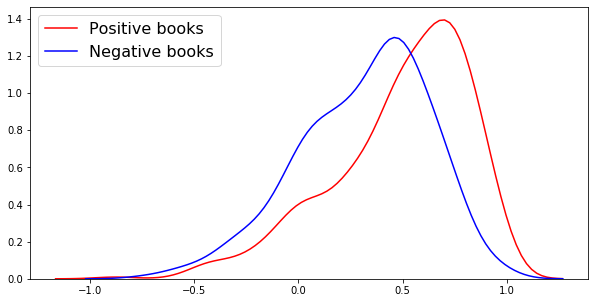

In [152]:
plt.figure(figsize = (10,5))
sns.kdeplot(pos_final, color = 'red')
sns.kdeplot(neg_final, color = 'blue')
#plt.xlabel('Outgoing Strength', fontsize = 14)
#plt.ylabel('Count', fontsize = 14)
#plt.title('Distribution of sentiment for the Two Parties', fontsize = 18)
plt.legend(['Positive books', 'Negative books'], fontsize = 16)
plt.show()

In [165]:
neg_books.rating = pd.to_numeric(neg_books["rating"])

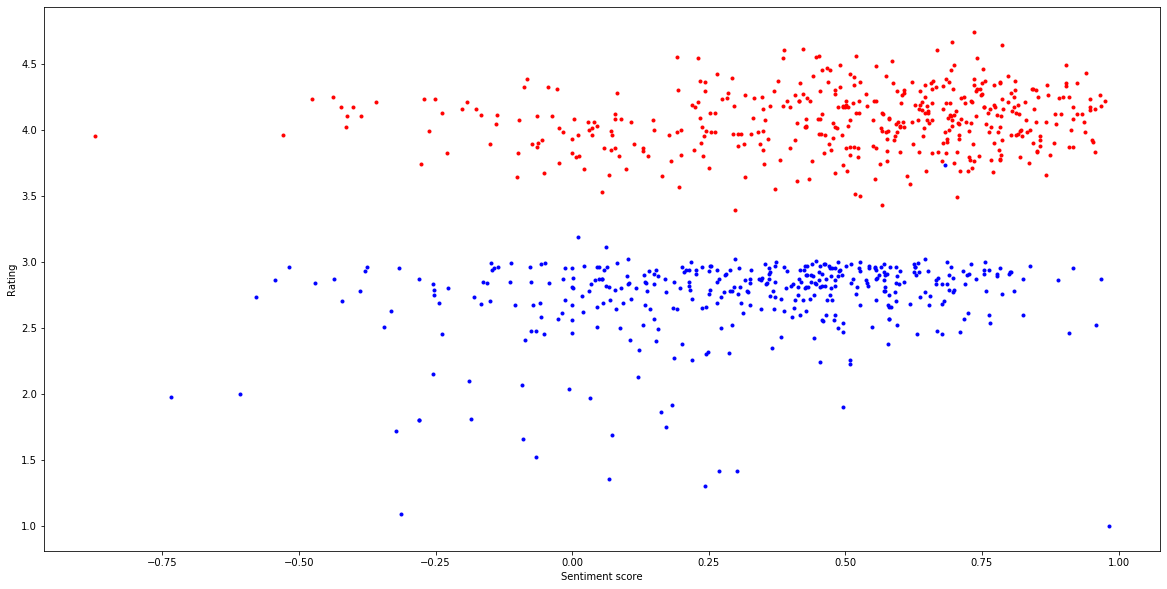

In [168]:
plt.figure(figsize = (20, 10))
plt.plot(pos_final, pos_books_reviewed["rating"], ".", color = "red")
plt.plot(neg_final, neg_books["rating"], ".", color = "blue")
plt.xlabel("Sentiment score")
plt.ylabel("Rating")
plt.show()

In [170]:
from scipy import stats
t2, p2 = stats.ttest_ind(pos_final,neg_final)
print("t = " + str(t2))
print("p = " + str(p2))

t = 8.049534352126432
p = 2.8549026416671453e-15


In [178]:
pos_extreme = pd.DataFrame(pos_final)
pos_extreme["tag"] = 1
neg_extreme = pd.DataFrame(neg_final)
neg_extreme["tag"] = 0

In [182]:
combined = pd.concat([pos_extreme, neg_extreme]).reset_index()

In [185]:
mean_sent = combined["compound"].mean()
std_sent = combined["compound"].std()

In [186]:
pos_thres = mean_sent + 2*std_sent
neg_thres = mean_sent - 2*std_sent

In [193]:
pos_extreme = combined[combined["compound"] > pos_thres]
neg_extreme = combined[combined["compound"] < neg_thres]

In [197]:
pos_thres

1.072275282475208

In [199]:
neg_extreme.groupby("tag")["tag"].count()

tag
0    19
1    13
Name: tag, dtype: int64

In [200]:
mean_sent

0.4075558292438555

In [202]:
std_sent

0.3323597266156762

In [208]:
pos_thres_new = np.percentile(combined["compound"], 95)

In [209]:
neg_thres_new = np.percentile(combined["compound"], 5)

In [210]:
pos_extreme_new = combined[combined["compound"] > pos_thres_new]
neg_extreme_new = combined[combined["compound"] < neg_thres_new]

In [211]:
len(pos_extreme_new)

42

In [213]:
len(neg_extreme_new)

42

In [215]:
len(combined)*0.05

41.800000000000004

In [207]:
np.percentile(combined["compound"], 5)

-0.20848576923076922

In [173]:
pos_scored["tag"] = 1
neg_scored["tag"] = 0

In [175]:
combined = pd.concat([pos_scored, neg_scored])

In [177]:
pos_final

idx_original
0      0.538353
1      0.466673
2      0.646207
3      0.261220
4      0.225567
         ...   
437    0.648447
438    0.554407
439    0.385153
440    0.804127
441    0.745987
Name: compound, Length: 442, dtype: float64

In [84]:
all_tokens_pos = []
for rev in test[0][test4.index]:
    tokens = tokenizer.tokenize(rev)
    all_tokens_pos.append(len(tokens))

In [88]:
np.mean(all_tokens)

13.564971751412429

In [89]:
all_tokens_neg = []
for rev in test[0][test5.index]:
    tokens = tokenizer.tokenize(rev)
    all_tokens_neg.append(len(tokens))

In [90]:
np.mean(all_tokens_neg)

7.190476190476191

In [94]:
test6 = test3[test3["compound"] > 0.3]
test7 = test3[test3["compound"] < -0.3]

In [96]:
len(test7)

1307

In [41]:
test3 = pd.DataFrame(test2)

0
0         {'neg': 0.128, 'neu': 0.69, 'pos': 0.182, 'com...
1         {'neg': 0.113, 'neu': 0.595, 'pos': 0.292, 'co...
2         {'neg': 0.082, 'neu': 0.647, 'pos': 0.271, 'co...
3         {'neg': 0.174, 'neu': 0.628, 'pos': 0.197, 'co...
4         {'neg': 0.184, 'neu': 0.566, 'pos': 0.25, 'com...
...                                                     ...
6629      {'neg': 0.077, 'neu': 0.408, 'pos': 0.515, 'co...
neg       0       0.128
1       0.113
2       0.082
3   ...
neu       0       0.690
1       0.595
2       0.647
3   ...
pos       0       0.182
1       0.292
2       0.271
3   ...
compound  0       0.8304
1       0.9972
2       0.9993
3...

[6634 rows x 1 columns]

In [81]:
sent_lexicon = pd.read_csv('sent_lexicon.txt', sep = '\t')
sent_lex = sent_lexicon.set_index('word')['happiness_average']

In [85]:
import numpy as np
def get_sent(x):
    y = [sent_lex.get(a) for a in x if a in sent_lex]
    return pd.Series([np.mean(y)], index=['average_score'])

In [86]:
test['sent_score'] = test[0].apply(get_sent)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.



In [90]:
test2 = clean_text(neg_df, dictionary_us)

In [91]:
test2['sent_score'] = test2[0].apply(get_sent)

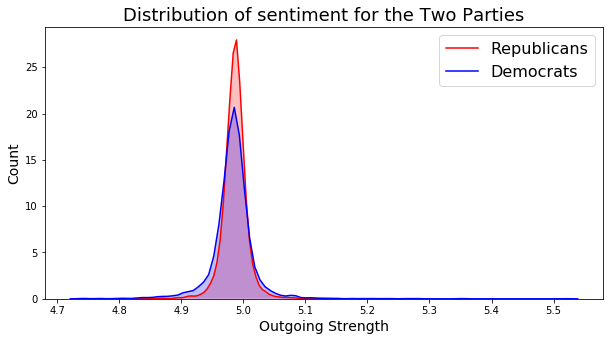

In [92]:
plt.figure(figsize = (10,5))
sns.kdeplot(test[test['sent_score'].notna()]['sent_score'], shade = True, color = 'red')
sns.kdeplot(test2[test2['sent_score'].notna()]['sent_score'], shade = True, color = 'blue')
plt.xlabel('Outgoing Strength', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Distribution of sentiment for the Two Parties', fontsize = 18)
plt.legend(['Republicans', 'Democrats'], fontsize = 16)
plt.show()